# 主成分分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 2値分類のサンプル
## データセットの読み込み

In [2]:
iris = load_iris()
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
#print("shape")
#print(iris['data'].shape)
#print("特徴量の確認")
#print(iris['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']


No handles with labels found to put in legend.


データのサイズ数
(100, 2)


Text(0, 0.5, 'feature 2')

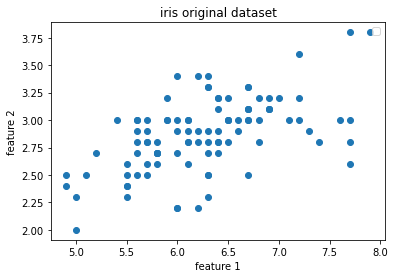

In [3]:
#簡単なサンプルにするためにデータを加工する
target_mask = iris['target'] != 0 
feature_mask = [True, True, False, False]

X = iris.data[target_mask, :]  #ラベルがsetosa以外のデータのみ抽出
X = X[:, feature_mask]         #特徴量がsepal length, sepaal widthのみを抽出
print("データのサイズ数")
print(X.shape)

y = iris.target[target_mask]

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('iris original dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## データの標準化
各特徴量のぱらつき加減を同じにするため、データの標準化を行う

No handles with labels found to put in legend.


(-4.0, 4.0)

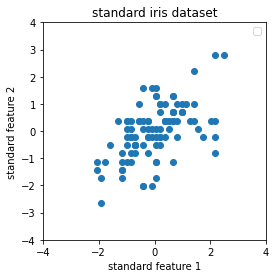

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

plt.figure(figsize=(4,4))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('standard iris dataset')
plt.xlabel('standard feature 1')
plt.ylabel('standard feature 2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

## 主成分分析(PCA Principal Conponent Analysis)
データの分散が最大化されるように特徴量を選択する。  

- 共分散行列を作成する
- 共分散行列の固有値、固有ベクトルを計算する
- 固有値の大きい順に固有ベクトルを選択する
- 固有ベクトルから射影行列を作成する

In [5]:
import pandas as pd
from sklearn.decomposition import PCA

n_components = 2  #分析後の主成分数

pca = PCA(n_components)
X_pca = pca.fit_transform(X_std)

### 固有値の確認

In [6]:
pd.DataFrame(pca.explained_variance_, index=['PC1の固有値', 'PC2の固有値'])

,0
PC1の固有値,1.569550
PC2の固有値,0.450652


### 固有ベクトルの確認
固有値の大きい順に固有ベクトルを並べた場合、固有ベクトル1と固有ベクトル2は直行する関係になる。  
これは主成分分析後の軸はそれぞれ独立しているためである。  

In [7]:
pd.DataFrame(pca.components_, index = ['固有ベクトル1', '固有ベクトル2'], columns=['feature 1 成分', 'feature 2 成分'])

,feature 1 成分,feature 2 成分
固有ベクトル1,0.707107,0.707107
固有ベクトル2,0.707107,-0.707107


固有値をまとめた行列が射影行列となり、主成分分析では射影行列は回転行列となる。  
左上の要素は$cos\theta$に相当しているため、回転の角度成分を計算することができる。

In [8]:
theta = np.arccos(pca.components_[0][0])
print(theta/np.pi*180, "[deg]")

44.99999999999998 [deg]


### 寄与率と累積寄与率
寄与率は特定の固有ベクトルが全体の内どの程度情報を含んでいるのかを示している。  
寄与率 = 該当固有ベクトルの固有値 / 全固有値の合計


累積寄与率は第１固有ベクトルからの寄与率の累積和である。

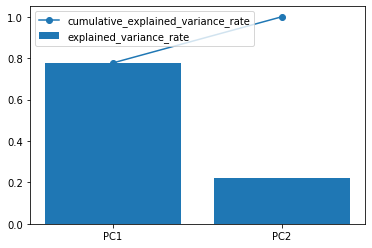

In [9]:
explained_variance_rate = pca.explained_variance_ratio_
cumulative_explained_variance_rate = np.cumsum(explained_variance_rate)

indexes = [f"PC{i+1}" for i in range(n_components)]

plt.bar(range(n_components), explained_variance_rate, label="explained_variance_rate")
plt.plot(range(n_components), cumulative_explained_variance_rate, marker="o", label="cumulative_explained_variance_rate")
plt.xticks(range(n_components), indexes)
plt.legend(loc='best')

## 主成分分解前後のデータの比較
主成分分析前後のデータを比較すると、
- PC1軸の向きが分散が大きい  
- PC2軸の向きが分散が小さい
- 主成分分析の射影行列は回転行列であるため、全データについてPC1軸で分散が最大になるよう回転したようなデータとなる

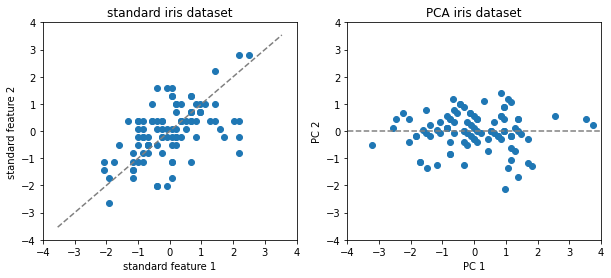

In [10]:
#主成分分析後のPCA1軸と平行なグラフnx-nyを作成
nx = np.linspace(-5, 5, 100)
ny = np.zeros(100)

#射影行列をかけて主成分分析を行う向きを計算
mx, my = pca.components_.dot(np.array([nx, ny]))

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(X_std[: , 0], X_std[: , 1])
plt.plot(mx, my, color="gray", linestyle = "--")
plt.title('standard iris dataset')
plt.xlabel('standard feature 1')
plt.ylabel('standard feature 2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.subplot(1, 2, 2)

#グラフを見やすくするためPC2に*(-1)する 主成分分析はペクトルの向きが反転しても主成分の向きに変化はない
plt.scatter(X_pca[: , 0], -X_pca[: , 1])
plt.plot(nx, ny, color="gray", linestyle = "--")
plt.title('PCA iris dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.show()

# Digit画像データのサンプル
## データセットの読み込み

In [11]:
from sklearn import datasets

digits = datasets.load_digits()
print("データセット内容の種類")
print(digits.keys())
print("特徴量の種類")
print(digits['feature_names'])
print("ラベルの種類")
print(digits.target_names)
print("shape")
print(digits['data'].shape)
#print("特徴量の確認")
#print(digits['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
特徴量の種類
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
ラベルの種類
[0 1 2 3 4 5 6 7 8 9]
shape
(1797, 64)


<Figure size 432x288 with 0 Axes>

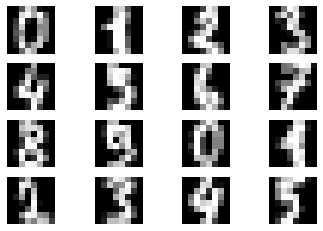

In [12]:
import math

X = digits.data
y = digits.target
target_names = iris.target_names

plt.gray()
fig = plt.figure()
row_and_col = math.ceil(math.sqrt(len(X[0:16])))
for i, data in enumerate(X[0:16]):
    ax = fig.add_subplot(row_and_col,row_and_col,i + 1)
    ax.imshow(data.reshape(8,8))
    ax.axis("off")

## 主成分分析(PCA Principal Conponent Analysis)

In [13]:
import pandas as pd
from sklearn.decomposition import PCA

n_components = 3  #分析後の主成分数

pca = PCA(n_components)
X_pca = pca.fit_transform(X)

## 固有値の確認

In [14]:
idx=['PC1の固有値', 'PC2の固有値', 'PC3の固有値']
pd.DataFrame(pca.explained_variance_[:5], index=idx)

,0
PC1の固有値,179.006930
PC2の固有値,163.717747
PC3の固有値,141.788439


## 主成分軸の確認
主成分軸(PC1, PC2)で各画像をグラフに表すと下のようになる。
元の画像だと64次元と多くの次元数が必要なデータだったが、  
主成分軸では2軸のみでも数字のまとまりの区別ができる程度に情報が保たれている。



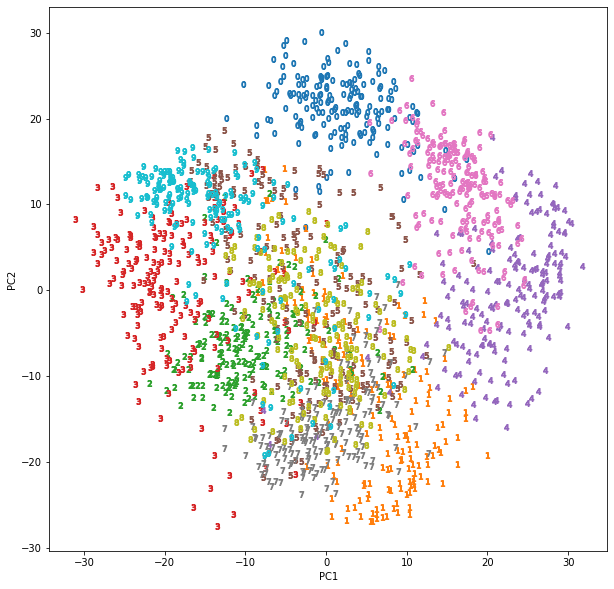

In [15]:
plt.figure(figsize=(10,10))

for i in range(10):
  plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], marker=f"${i}$")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


特徴量が多い場合は主成分軸の成分を可視化することは難しいが、  
画像データの場合は固有ベクトル内の各特徴量の値を表示することで大まかな可視化を行うことができる。  
固有ベクトルの要素の絶対値が大きい場合、その特徴量の影響を大きく受け、  
0に近い場合、その特徴量の影響は小さい。  
 
下のヒートマップのデータより、以下の内容がわかる。
- 左右の各1ピクセルのデータはPC1-3の固有ベクトルにあまり影響を与えていない
- 上のグラフよりPC1軸に注目すると"4"の値が高く、"3"の値が低い。それに対応するようにヒートマップにおいても、"4"が描かれる場所のピクセルの数値は高く、"3"が描かれる場所のピクセルは低い値となる
- 上のグラフよりPC1軸に注目すると"0", "6"の値が高く、"1", "3"の値が低い。それに対応するようにヒートマップにおいても、"0", "6"が描かれる場所のピクセルの数値は高く、"1", "3"が描かれる場所のピクセルは低い値となる

             0         1         2         3         4         5         6   \
0 -3.504350e-18 -0.017309 -0.223429 -0.135913 -0.033032 -0.096634 -0.008329   
1  6.040294e-18 -0.010106 -0.049085 -0.009433 -0.053602 -0.117755 -0.062128   
2  1.861000e-17  0.018342  0.126476  0.132155 -0.134016 -0.264939 -0.116644   

         7         8         9   ...        54        55        56        57  \
0  0.002269 -0.000321 -0.119309  ... -0.063288  0.000962  0.000010 -0.014079   
1 -0.007936 -0.000163 -0.021017  ...  0.148776  0.000542 -0.000033 -0.010079   
2 -0.016842  0.000394  0.079437  ...  0.222787  0.021862 -0.000014  0.017583   

         58        59        60        61        62        63  
0 -0.235675 -0.141226 -0.009160 -0.089418 -0.036598 -0.011468  
1 -0.070272  0.017111  0.194296  0.176697  0.019455 -0.006697  
2  0.123158  0.098353  0.138485  0.232084  0.167027  0.034804  

[3 rows x 64 columns]


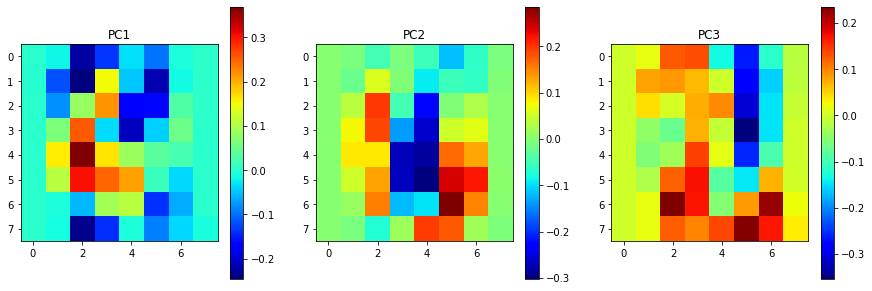

In [16]:
print(pd.DataFrame(pca.components_).head())

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    heatmap = np.reshape(pca.components_[i], (8, 8))
    im = plt.imshow(heatmap, cmap=plt.cm.jet)
    plt.title("PC"+str(i+1))
    plt.colorbar()
plt.show()

### 寄与率と累積寄与率

各主成分軸が情報(データのばらつき)の保存にどれだけ寄与しているかを寄与率で表せる。  
また、固有値の高い主成分から順番に累積した場合の寄与率を累積寄与率で表せる。  

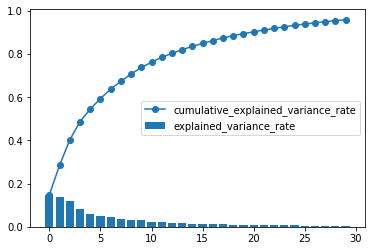

In [17]:
n_components = 64  #分析後の主成分数

pca = PCA(n_components)
X_pca = pca.fit_transform(X)

explained_variance_rate = pca.explained_variance_ratio_
cumulative_explained_variance_rate = np.cumsum(explained_variance_rate)

n = 30
plt.bar(range(n), explained_variance_rate[:n], label="explained_variance_rate")
plt.plot(range(n), cumulative_explained_variance_rate[:n], marker="o", label="cumulative_explained_variance_rate")
plt.legend(loc='best')

## 主成分分解前後のデータの比較
主成分軸の数が少ない場合には情報が失われてしまう。
inverse_transform関数を用いることで主成分分析したデータを元データに復元することができる。  
元データと復元後のデータを比較することで実際にどの程度情報が失われているかを確認することができる。  

下の図を見ると主成分軸の値が小さい場合は画像が荒くなり、情報が失われていることが分かる。  
また、値が大きくなると主成分分解しても目視で分からないほど情報が保たれていることになる。  

<Figure size 432x288 with 0 Axes>

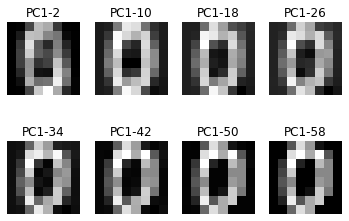

In [18]:
plt.gray()
fig = plt.figure()
for i, n in enumerate(range(2, 64, 8)):
    pca = PCA(n)
    X_pca = pca.fit_transform(X)
    X_inv = pca.inverse_transform(X_pca)
    
    plt.subplot(2, 4, i+1)
    data = np.reshape(X_inv[0, :], (8, 8))
    plt.imshow(data)
    plt.title("PC1-" + str(n))
    plt.axis("off")